In [1]:
import time

import pandas as pd # used to load the data
import numpy as np # optimized numerical library

from sklearn import preprocessing, metrics, utils, decomposition, model_selection, linear_model, discriminant_analysis, svm, tree, ensemble # library providing several ML algorithms and related utility
from sklearn.neural_network import MLPClassifier

from imblearn import over_sampling # provides several resampling techniques to cope with unbalanced datasets (https://github.com/scikit-learn-contrib/imbalanced-learn) compatible with sklearn

from collections import Counter

import matplotlib.pyplot as plt # used for plotting

# Start by defining three helper functions:
# - one to plot the sample distribution  acorss the class labels (to see how un-/balanced the dataset is)
# - one to compute and plot the confusion matrix
# - one to plot data in 2D with different colors per class label

def plot_pie(y, labels, title=""):
    target_stats = Counter(y)
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.set_title(title + " (size: %d)" % len(y))
    ax.pie(sizes, explode=explode, labels=target_stats.keys(), shadow=True, autopct='%1.1f%%')
    ax.axis('equal')


def compute_and_plot_cm(ytest, ypred, labels, title=""):
    global nfigure
    # Compute confusion matrix
    cm = metrics.confusion_matrix(ytest, ypred)
    
    accuracy = metrics.accuracy_score(ytest, ypred, normalize=True)

    # Normalize the matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    # Plot the confusion matrix

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) # plot the confusionmatrix using blue shaded colors
    plt.title("Confusion Matrix Normalized (%s) Accuracy: %.1f%%" % (title, accuracy*100)) # add title
    plt.colorbar() # plot the color bar as legend

    # Plot the x and y ticks using the class label names
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)


def plot_2d(xpred, ypred, labels, title=""):
    global nfigure
    # define the colors to use for each class label
    colors = ['red', 'blue', 'green', 'yellow', 'black']
    len_colors = len(colors)
    if len_colors < len(labels):
        print("WARNING: we have less colors than classes: some classes will reuse the same color")

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.title("Feature Space (%s)" % title) # add title


    # plot each class label with a separate color 
    for c in [4,5]:
        cur_class = (ypred == c) # get all points belonging to class c
        plt.plot(xpred[cur_class, 0], xpred[cur_class, 1], 'o', color=colors[c % len_colors]) # plot class c


nfigure = 0 #used to number the figures

In [ ]:
# conda install -c glemaitre imbalanced-learn

# 1. Loading the data

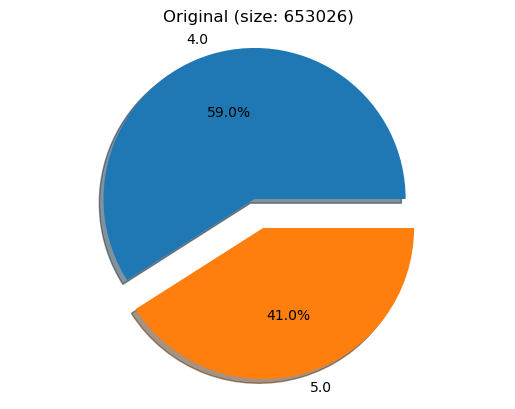

In [2]:
################ Load data ####################
# Get the dataset loaded and define class labels 
data = pd.read_csv('jobs.csv', header=0)
data_class_labels = ["successful", "unsuccessful"]

# All data columns except last are input features (X), last column is output label (y)
n_features = len(data.columns) - 1

X = data.iloc[:,0:n_features]
y = data.iloc[:,n_features]

X = X[y != 2]
y = y[y != 2]

X = X[y != 3]
y = y[y != 3]

plot_pie(y, data_class_labels, "Original")

### What problem do you see? 


### Lets make the data balance: over_sampling.SMOTE

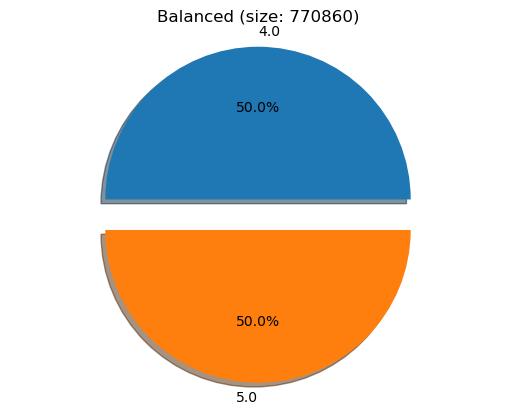

In [3]:
################ Resample data #################

# Google data is very skewed, try to balance the dataset
sm = over_sampling.SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

# Plot the balanced label distribution
plot_pie(y, data_class_labels, "Balanced")

### Lets have a smaller number of samples:  utils.resample()

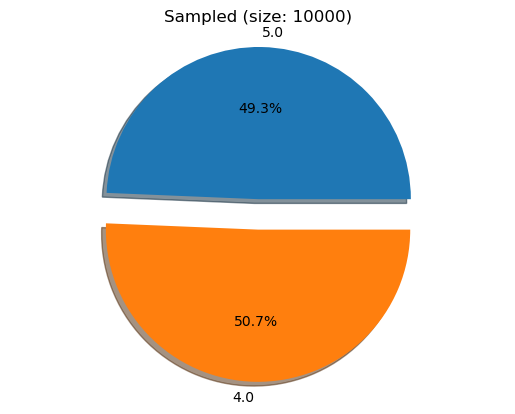

In [4]:
# Resample the data with simple random resampling (if too big)
# - replace decideds if sampling with or without replacement
# - n_samples decide the size of the ouput: if set to None ouput = input (i.e. no resampling)
X, y = utils.resample(X, y, replace=False, n_samples=10000)

# Plot the resampled label distribution

plot_pie(y, data_class_labels, "Sampled")

# 2. Preparing the data

In [5]:
################ Split data ####################
# Split data in training and testing for 0.33 ratio of testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

### Standardize the data

In [6]:
################ Scale data ####################
# Train a scaler to standardize the features (zero mean and unit variance)
scaler = preprocessing.StandardScaler().fit(X_train)

# ... and scale the features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Finding the k principle components (Bonus)

In [ ]:
################ PCA ####################
# Train a PCA with k dimensions: Write a script to find minimum number of k components that ...
# contain 90% of variance description

# Your code here

# pca = decomposition.PCA(n_components=5).fit(X_train)

# # ... and apply it to the features
# X_train_scaled_pca = pca.transform(X_train)
# X_test_scaled_pca = pca.transform(X_test)

# 3. Logistic Regression

In [7]:
import warnings
warnings.filterwarnings("ignore")
################ Logit ##################
# Train a Logit model on the original features
# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# penalty{'none', 'l2', 'l1', 'elasticnet'}
# C{}
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = [['l2','none'], ['l2', 'none'], ['l1', 'l2'], ['l2', 'none'], ['l1', 'l2', 'none']]
clist = [0.5,1,2,4,8]

for i in range(0,5):
    for j in penalty[i]:
        for k in clist:
            lr = linear_model.LogisticRegression(solver=solver[i], penalty=j, max_iter=600, C = k).fit(X_train, y_train)
            # # Compute the predicted labels on test data
            y_lr = lr.predict(X_test)
            print("Acuracy of", solver[i], j, k," : %.1f%%" % (metrics.accuracy_score(y_test,y_lr)*100))

# compute_and_plot_cm(,, title="LR")

Acuracy of newton-cg l2 0.5  : 84.0%
Acuracy of newton-cg l2 1  : 84.4%
Acuracy of newton-cg l2 2  : 84.5%
Acuracy of newton-cg l2 4  : 84.5%
Acuracy of newton-cg l2 8  : 84.6%
Acuracy of newton-cg none 0.5  : 84.3%
Acuracy of newton-cg none 1  : 84.3%
Acuracy of newton-cg none 2  : 84.3%
Acuracy of newton-cg none 4  : 84.3%
Acuracy of newton-cg none 8  : 84.3%
Acuracy of lbfgs l2 0.5  : 83.5%
Acuracy of lbfgs l2 1  : 83.5%
Acuracy of lbfgs l2 2  : 83.5%
Acuracy of lbfgs l2 4  : 83.5%
Acuracy of lbfgs l2 8  : 83.5%
Acuracy of lbfgs none 0.5  : 83.5%
Acuracy of lbfgs none 1  : 83.5%
Acuracy of lbfgs none 2  : 83.5%
Acuracy of lbfgs none 4  : 83.5%
Acuracy of lbfgs none 8  : 83.5%
Acuracy of liblinear l1 0.5  : 84.6%
Acuracy of liblinear l1 1  : 84.5%
Acuracy of liblinear l1 2  : 84.4%
Acuracy of liblinear l1 4  : 84.4%
Acuracy of liblinear l1 8  : 84.3%
Acuracy of liblinear l2 0.5  : 83.6%
Acuracy of liblinear l2 1  : 82.9%
Acuracy of liblinear l2 2  : 83.3%
Acuracy of liblinear l2 4  :

#### Apply LR on PCA components (Bonus)

In [ ]:

# # Train a Logit model on pca extracted features
# lr_pca = linear_model.LogisticRegression().fit(X_train,y_train)
# # Compute the predicted labels on test data
# y_lr_pca = lr_pca.predict(X_test)
# print("Acuracy of", solver[i], j, k," : %.1f%%" % (metrics.accuracy_score(y_test,y_lr)*100))

# #compute_and_plot_cm(,,, title="LR + PCA")

# #plot_2d(,, title="LR + PCA")


# 4. Apply Support Vector Machine

In [14]:
################ SVM ##################
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
clist = [0.5,1,2,4,8]

for i in kernel:
    for j in gamma:
        for k in clist:
            sv = svm.SVC(kernel=i, gamma=j, C=k).fit(X_train_scaled, y_train)
            # Compute the predicted labels on test data
            y_sv = sv.predict(X_test_scaled)
            print("Acuracy of", i, j, k," : %.1f%%" % (metrics.accuracy_score(y_test,y_sv)*100))
        

        
# Train a SVM model on PCA extracted features
#sv_pca = svm.SVC().fit(,)

# Compute the predicted labels on test data
#y_sv_pca = sv_pca.predict(,)
#print()

# Show confusion matrix
#compute_and_plot_cm(,,, title="SVM + PCA")

# Show data in 2D
#plot_2d(,,, title="SVM + PCA")


Acuracy of linear scale 0.5  : 83.6%
Acuracy of linear scale 1  : 84.0%
Acuracy of linear scale 2  : 84.8%
Acuracy of linear scale 4  : 85.7%
Acuracy of linear scale 8  : 86.2%
Acuracy of linear auto 0.5  : 83.6%
Acuracy of linear auto 1  : 84.0%
Acuracy of linear auto 2  : 84.8%
Acuracy of linear auto 4  : 85.7%
Acuracy of linear auto 8  : 86.2%
Acuracy of poly scale 0.5  : 82.5%
Acuracy of poly scale 1  : 83.6%
Acuracy of poly scale 2  : 85.6%
Acuracy of poly scale 4  : 87.9%
Acuracy of poly scale 8  : 88.1%
Acuracy of poly auto 0.5  : 81.9%
Acuracy of poly auto 1  : 83.3%
Acuracy of poly auto 2  : 84.9%
Acuracy of poly auto 4  : 87.5%
Acuracy of poly auto 8  : 88.0%
Acuracy of rbf scale 0.5  : 89.6%
Acuracy of rbf scale 1  : 90.1%
Acuracy of rbf scale 2  : 90.2%
Acuracy of rbf scale 4  : 90.6%
Acuracy of rbf scale 8  : 90.7%
Acuracy of rbf auto 0.5  : 89.7%
Acuracy of rbf auto 1  : 90.2%
Acuracy of rbf auto 2  : 90.3%
Acuracy of rbf auto 4  : 90.6%
Acuracy of rbf auto 8  : 90.6%
Acu

# 5. Apply Decision Tree

In [ ]:
################ DecisionTree ##################
criterion = ['gini', 'entropy', 'log_loss']



# Train a DT model on the original features
#dt = tree.DecisionTreeClassifier().fit(,)

# Compute the predicted labels on test data
#y_dt = dt.predict()
#print()

# Show confusion matrix
#compute_and_plot_cm(,, title="DT")

# Train a DT model on PCA extracted features
#dt_pca = tree.DecisionTreeClassifier().fit(,)


# Compute the predicted labels on test data
#y_dt_pca = dt_pca.predict()

#print()

# Show confusion matrix
#compute_and_plot_cm(,, title="DT + PCA")

# Show data in 2D
#plot_2d(,, title="DT + PCA")




# 6. Apply Random Forest

<BarContainer object of 28 artists>

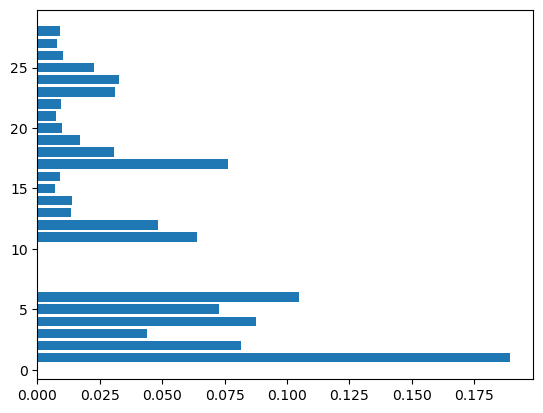

In [11]:
################ RandomForest 
# n_features = 28
# bootstrap = [True, False]
# max_depth = [None, 2, 4, 8, 16]
# max_features = ["sqrt", "log2", None, n_features]
# min_samples_leaf = [1, 2, 4, 8, 16]
# min_samples_split = [2, 4, 8]
# n_estimator = [10, 100, 500]

# for i in bootstrap:
#     for j in max_depth:
#         for k in max_features:
#             for l in min_samples_leaf:
#                 for m in min_samples_split:
#                     for n in n_estimator:
#                         rf = ensemble.RandomForestClassifier(bootstrap=i,max_depth=j,max_features=k,min_samples_leaf=l,min_samples_split=m,n_estimators=n).fit(X_train_scaled, y_train)
#                         y_rf = rf.predict(X_test_scaled)
#                         print("Acuracy of", i, j, k, l, m, n," : %.1f%%" % (metrics.accuracy_score(y_test,y_rf)*100))

rf = ensemble.RandomForestClassifier().fit(X_train_scaled, y_train)
bar = range(1,29)
plt.barh(bar, rf.feature_importances_)

# Compute the predicted labels on test data
#y_rf = rf.predict()
#print()

# Show confusion matrix
#compute_and_plot_cm(,, title="RF")

# Train a Logit model on PDA extracted features
#rf_pca = ensemble.RandomForestClassifier().fit(,)

# Compute the predicted labels on test data
#y_rf_pca = rf_pca.predict()
#print()

# Show confusion matrix
#compute_and_plot_cm(,, title="RF + PCA")

# Show data in 2D
#plot_2d(,, title="RF + PCA")

# 7. Multi-Layer Perceptron (MLP)

In [ ]:
################ Multi-Layer Perceptron ##################
hidden_layer_sizes = [50, 100, 500]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
learning_rate = ['constant', 'invscaling', 'adaptive']

for i in hidden_layer_sizes:
    for j in activation:
        for k in solver:
            for l in learning_rate:
                mlp = MLPClassifier(hidden_layer_sizes=i, activation=j, solver=k, learning_rate=l)
                ml = mlp.fit(X_train_scaled,y_train)
                mlpredict = ml.predict(X_test_scaled)
                print("Acuracy of", i, j, k, l," : %.1f%%" % (metrics.accuracy_score(y_test,mlpredict)*100))

# Train an MLP model on the original features
#mlp = MLPClassifier ()
#ml = mlp.fit(,)

# Compute the predicted labels on test data
#y_mlp = ml.predict()

#print the accuracy

# print the prediction probability for each class
#compute_and_plot_cm(,, title='MLP')

Acuracy of 50 identity lbfgs constant  : 84.0%
Acuracy of 50 identity lbfgs invscaling  : 84.4%
Acuracy of 50 identity lbfgs adaptive  : 84.4%
Acuracy of 50 identity sgd constant  : 79.1%
Acuracy of 50 identity sgd invscaling  : 65.8%
Acuracy of 50 identity sgd adaptive  : 78.9%
Acuracy of 50 identity adam constant  : 83.5%
Acuracy of 50 identity adam invscaling  : 83.7%
Acuracy of 50 identity adam adaptive  : 83.4%
Acuracy of 50 logistic lbfgs constant  : 90.3%
Acuracy of 50 logistic lbfgs invscaling  : 90.8%
Acuracy of 50 logistic lbfgs adaptive  : 91.1%
Acuracy of 50 logistic sgd constant  : 77.1%
Acuracy of 50 logistic sgd invscaling  : 56.9%
Acuracy of 50 logistic sgd adaptive  : 77.3%
Acuracy of 50 logistic adam constant  : 91.6%
Acuracy of 50 logistic adam invscaling  : 91.5%
Acuracy of 50 logistic adam adaptive  : 91.6%
Acuracy of 50 tanh lbfgs constant  : 89.5%
Acuracy of 50 tanh lbfgs invscaling  : 90.0%
Acuracy of 50 tanh lbfgs adaptive  : 89.4%
Acuracy of 50 tanh sgd consta